In [1]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

### Column description of housing dataset

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
df_train = pd.read_csv('/Users/juhimishra/Downloads/Project-Housing_splitted/train.csv')
df_test = pd.read_csv('/Users/juhimishra/Downloads/Project-Housing_splitted/test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
df_train.shape

(1168, 81)

In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [7]:
df_test.shape

(292, 80)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [10]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df_train.isna().sum().to_frame('no of missing data')

,no of missing data
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,214
LotArea,0
Street,0
Alley,1091
LotShape,0
LandContour,0
Utilities,0


There are lot many columns consist of missing values. Listed below the columns which contain missing values
1. LotFrontage, 2. Alley, 3. MasVnrType, 4.MasVnrArea, 5.BsmtQual, 6. BsmtCond, 7. BsmtExposure, 8. BsmtFinType1, 9. BsmtFinType2,
10. FireplaceQu, 11. GarageType, 12. GarageYrBlt, 13. GarageFinish, 14. GarageQual 15. GarageCond, 16. PoolQC, 17. Fence,
18. MiscFeature.

.With the help of isna come across that 18 columns are having missing values 

In [12]:
df_test.isna().sum().to_frame('no of missing value')

,no of missing value
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,45
LotArea,0
Street,0
Alley,278
LotShape,0
LandContour,0
Utilities,0


In test dataset all the columns that train data were having missing values same only Electricl where we found 1 missing value which was not in train data. so need to trea the same as per datatype and requirement.
Missing columns are mentioned below:
1. LotFrontage, 2. Alley, 3. MasVnrType, 4. MasVnrArea, 5. BsmtQual, 6. BsmtCond, 7. BsmtExposure, 8. BsmtFinType1,
9. BsmtFinType2 10. Electrical 11. FireplaceQu. 12. GarageType 13. GarageYrBlt 14. GarageFinish 15. GarageQual, 16.GarageCond,
17. PoolQC, 18. Fence 19. MiscFeature

In [13]:
# Check the name of coloumns which contain string
df_train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
# Checking length
len(df_train.select_dtypes(include='object').columns)

43

In [15]:
# Check the name of coloumns which contain numerical value
df_train.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
# Checking Length
len(df_train.select_dtypes(include=['int64', 'float64']).columns)

38

## Data Cleaning

In [240]:
# Dropping columns which are not much related to sales of house and having null values more than 50% 
df_train.drop(columns = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace = True)
df_test.drop(columns = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace = True)

In [244]:
df_train.drop(columns=['Id'],inplace = True)
df_test.drop(columns=['Id'],inplace = True)

In [246]:
df_train.shape


(1168, 75)

### Replacing all missing values using mean numerical columns and mode for object columns

In [17]:
missing_train = ['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC',
           'Fence','MiscFeature']
missing_test = ['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC',
           'Fence','MiscFeature','Electrical']

In [18]:
df_test['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

In [19]:
df_train['LotFrontage'].unique()

array([ nan,  95.,  92., 105.,  58.,  88.,  70.,  80.,  50.,  44., 129.,
        59.,  55.,  64.,  24.,  68.,  71.,  74.,  61.,  60., 120.,  84.,
       141.,  30.,  65.,  76., 100.,  85.,  75., 107., 122.,  82.,  62.,
        73.,  79.,  77.,  41.,  69.,  90.,  96.,  72.,  34.,  78.,  63.,
        40.,  98., 160., 108., 128.,  51.,  81.,  99.,  66.,  37., 174.,
        87.,  53., 152.,  47.,  86.,  56.,  89.,  35.,  52.,  21., 104.,
        57.,  83.,  46., 101., 112., 149.,  93.,  49.,  43., 130.,  54.,
        91.,  67.,  97., 110., 103., 115.,  94.,  48.,  36., 313., 109.,
       144., 121., 102., 116., 182.,  32.,  42., 168., 118.,  38., 140.,
       134., 114., 124.,  39., 111.,  45., 106., 153.])

In [20]:
df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [21]:
df_train['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [22]:
df_train['MasVnrArea'].unique()

array([0.000e+00, 4.800e+02, 1.260e+02, 1.800e+02, 6.700e+01, 2.230e+02,
       6.600e+01, 8.200e+01, 1.740e+02, 3.040e+02, 1.720e+02, 1.660e+02,
       1.840e+02, 3.500e+02, 4.120e+02, 1.000e+00, 1.890e+02, 1.120e+02,
       5.000e+01, 2.200e+02, 1.600e+01, 6.300e+02, 2.810e+02, 2.870e+02,
       3.400e+02, 2.160e+02,       nan, 1.400e+02, 1.830e+02, 3.360e+02,
       3.960e+02, 2.320e+02, 3.200e+02, 8.500e+01, 1.620e+02, 1.540e+02,
       1.760e+02, 1.200e+02, 1.080e+02, 2.520e+02, 1.300e+02, 3.510e+02,
       5.710e+02, 5.300e+01, 2.040e+02, 9.750e+02, 6.530e+02, 8.000e+01,
       4.720e+02, 3.400e+01, 1.650e+02, 2.370e+02, 1.130e+02, 9.000e+01,
       1.600e+02, 1.470e+02, 1.360e+02, 3.760e+02, 8.900e+01, 4.150e+02,
       2.000e+02, 5.060e+02, 2.860e+02, 4.500e+01, 2.450e+02, 2.470e+02,
       2.400e+02, 7.000e+01, 9.800e+01, 6.040e+02, 8.600e+02, 2.700e+01,
       1.530e+02, 2.120e+02, 2.060e+02, 7.600e+02, 2.960e+02, 5.280e+02,
       2.990e+02, 3.380e+02, 1.230e+02, 2.330e+02, 

In [23]:
df_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [24]:
df_train['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Po'], dtype=object)

In [25]:
df_train['BsmtExposure'].unique()

array(['No', 'Gd', 'Av', 'Mn', nan], dtype=object)

In [26]:
df_train['BsmtFinType1'].unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', nan], dtype=object)

In [27]:
df_train['BsmtFinType2'].unique()

array(['Unf', 'Rec', 'BLQ', 'GLQ', nan, 'ALQ', 'LwQ'], dtype=object)

In [29]:
df_train['GarageType'].unique()

array(['Attchd', 'BuiltIn', 'Detchd', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [30]:
df_train['GarageYrBlt'].unique()

array([1977., 1970., 1997., 2006., 1957., 1965., 1947., 1937., 2003.,
       1974., 1955., 1923., 2002., 2007., 1987., 2001., 1988., 1950.,
       1961., 1953., 2010., 1922., 1939., 2005., 1991., 1979., 1975.,
       1976., 1978., 1960., 1956., 2004., 1982., 2000., 1948.,   nan,
       1964., 1920., 1930., 1968., 1946., 1992., 1936., 1967., 1989.,
       1959., 1966., 1916., 1941., 1998., 1962., 1926., 1925., 1983.,
       1999., 1969., 1985., 1993., 2008., 1971., 1980., 1945., 1995.,
       1981., 1994., 1949., 1996., 1921., 1963., 1938., 1958., 1935.,
       1940., 1990., 1910., 1954., 1927., 2009., 1986., 1929., 1984.,
       1973., 1924., 1942., 1900., 1931., 1951., 1934., 1972., 1932.,
       1928., 1918., 1908., 1933., 1906., 1914., 1952., 1915.])

In [31]:
df_train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [32]:
df_train['GarageQual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [33]:
df_train['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [37]:
df_train['LotFrontage'] = df_train['LotFrontage'].replace(np.NaN,df_train['LotFrontage'].mean())
df_train['MasVnrArea'] = df_train['MasVnrArea'].replace(np.NaN,df_train['MasVnrArea'].mean())
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].replace(np.NaN,df_train['GarageYrBlt'].mean())

In [38]:
df_train['MasVnrType'].replace('None', np.nan, inplace=True)

In [39]:
df_train['MasVnrType'].unique()

array([nan, 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [40]:

df_train['MasVnrType'] = df_train['MasVnrType'].replace(np.NaN,df_train['MasVnrType'].mode()[0])
df_train['BsmtQual'] = df_train['BsmtQual'].replace(np.NaN,df_train['BsmtQual'].mode()[0])
df_train['BsmtCond'] = df_train['BsmtCond'].replace(np.NaN,df_train['BsmtCond'].mode()[0])
df_train['BsmtExposure'] = df_train['BsmtExposure'].replace(np.NaN,df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].replace(np.NaN,df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].replace(np.NaN,df_train['BsmtFinType2'].mode()[0])
df_train['GarageType'] = df_train['GarageType'].replace(np.NaN,df_train['GarageType'].mode()[0])
df_train['GarageFinish'] = df_train['GarageFinish'].replace(np.NaN,df_train['GarageFinish'].mode()[0])
df_train['GarageQual'] = df_train['GarageQual'].replace(np.NaN,df_train['GarageQual'].mode()[0])
df_train['GarageCond'] = df_train['GarageCond'].replace(np.NaN,df_train['GarageCond'].mode()[0])

In [41]:
df_train.isna().any().any()

False

In [42]:
df_test['LotFrontage'] = df_train['LotFrontage'].replace(np.NaN,df_train['LotFrontage'].mean())
df_test['MasVnrArea'] = df_train['MasVnrArea'].replace(np.NaN,df_train['MasVnrArea'].mean())
df_test['GarageYrBlt'] = df_train['GarageYrBlt'].replace(np.NaN,df_train['GarageYrBlt'].mean())

In [43]:

df_test['MasVnrType'] = df_train['MasVnrType'].replace(np.NaN,df_train['MasVnrType'].mode()[0])
df_test['BsmtQual'] = df_train['BsmtQual'].replace(np.NaN,df_train['BsmtQual'].mode()[0])
df_test['BsmtCond'] = df_train['BsmtCond'].replace(np.NaN,df_train['BsmtCond'].mode()[0])
df_test['BsmtExposure'] = df_train['BsmtExposure'].replace(np.NaN,df_train['BsmtExposure'].mode()[0])
df_test['BsmtFinType1'] = df_train['BsmtFinType1'].replace(np.NaN,df_train['BsmtFinType1'].mode()[0])
df_test['BsmtFinType2'] = df_train['BsmtFinType2'].replace(np.NaN,df_train['BsmtFinType2'].mode()[0])
df_test['GarageType'] = df_train['GarageType'].replace(np.NaN,df_train['GarageType'].mode()[0])
df_test['GarageFinish'] = df_train['GarageFinish'].replace(np.NaN,df_train['GarageFinish'].mode()[0])
df_test['GarageQual'] = df_train['GarageQual'].replace(np.NaN,df_train['GarageQual'].mode()[0])
df_test['GarageCond'] = df_train['GarageCond'].replace(np.NaN,df_train['GarageCond'].mode()[0])
df_test['Electrical'] = df_train['Electrical'].replace(np.NaN,df_train['Electrical'].mode()[0])

In [44]:
df_test.isna().any().any()

False

## Visualisation analysis using seaborn and matplotlib

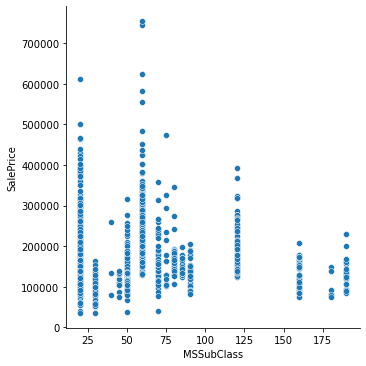

In [238]:
sns.relplot(x = 'MSSubClass', y = 'SalePrice', data = df_train)

As we can see with the help of relplot that type 25 dwelling is higher compare to others which are involved in sale. Few outliers can be seen in this column will fix it later using outliers method

In [46]:
df_train['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

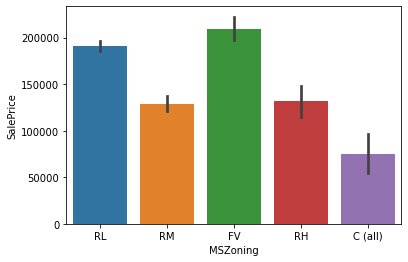

In [239]:
sns.barplot(x = 'MSZoning',y='SalePrice',data=df_train)

Observed from  bar plot that floating village residential plot are having higher sale  followed by residential low density and the lowest price is for commercial type of properties. Which means in US more demand is for residential houses. People purchase property for their own use instead of investing 

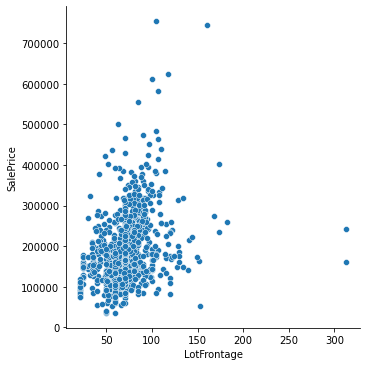

In [75]:
sns.relplot(x = 'LotFrontage', y = 'SalePrice', data = df_train)

Mainly higher selling price we can observe that lotfrontage i.e., linear feet of street which is between 50 - 100 ft are having higher and range between 1lac to 4 lac, so here street which is connected to property from 50-100ft are more in demand. But some points we can see that even reached to 6 lac and 7 lac which is unusual as the pice trend followed in market for 50-100 ft road is within 4 lac. With this we can say that there are outliers present in this column

In [84]:
df_train['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

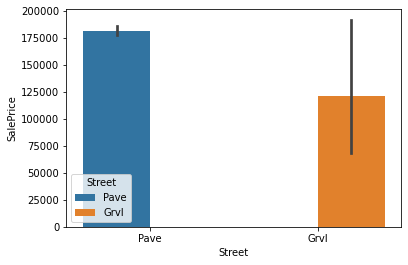

In [86]:
plt.figure(figsize=(6,4))
sns.barplot(x='Street',y='SalePrice',hue = 'Street',data=df_train)

Pave type which is access to property are in higher demand 

In [87]:
df_train['LotShape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

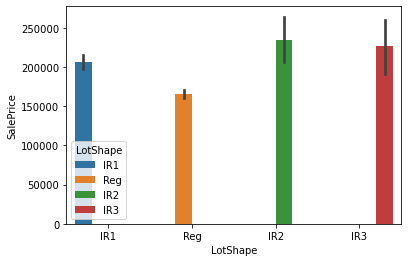

In [88]:
plt.figure(figsize=(6,4))
sns.barplot(x='LotShape',y='SalePrice',hue = 'LotShape',data=df_train)

moderate irregular and irregular shape of property are more in demand as we can see with the help of barplot that these two are showing higher selling price compare to other two

In [89]:
df_train['LandContour'].unique()

array(['Lvl', 'Bnk', 'HLS', 'Low'], dtype=object)

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

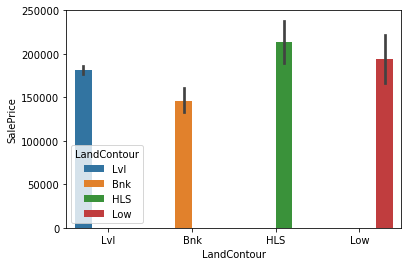

In [90]:
plt.figure(figsize=(6,4))
sns.barplot(x='LandContour',y='SalePrice',hue = 'LandContour',data=df_train)

Here landcontour Hill side which means flatness of property we can see more in demand. As price for this property is higher and lowest demand is for Banked

In [92]:
df_train['LotConfig'].unique()

array(['Inside', 'CulDSac', 'FR2', 'Corner', 'FR3'], dtype=object)

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

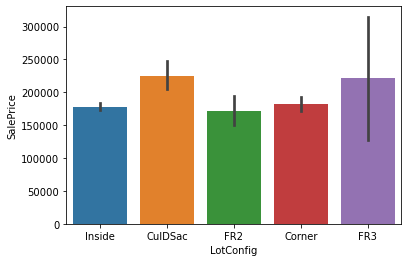

In [94]:
sns.barplot(x = 'LotConfig',y='SalePrice',data=df_train)

In case of lot configuration we can see that CulDSac and FR3 are having higher price compare to other configuration that means these two configuration are more in demand in market

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

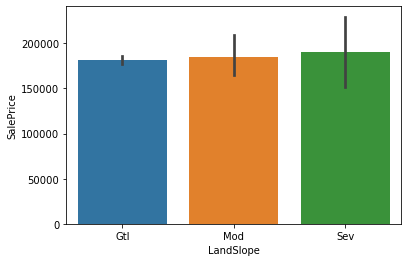

In [96]:
sns.barplot(x = 'LandSlope',y='SalePrice',data=df_train)

Almost all are having same price not much difference . There are little variation and little higher demand for Severe slope properties

In [97]:
df_train['Neighborhood'].unique()

array(['NPkVill', 'NAmes', 'NoRidge', 'NWAmes', 'Gilbert', 'Sawyer',
       'Edwards', 'IDOTRR', 'CollgCr', 'Mitchel', 'Crawfor', 'BrDale',
       'StoneBr', 'BrkSide', 'NridgHt', 'OldTown', 'Somerst', 'Timber',
       'SWISU', 'SawyerW', 'ClearCr', 'Veenker', 'Blmngtn', 'MeadowV',
       'Blueste'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'NPkVill'),
  Text(1, 0, 'NAmes'),
  Text(2, 0, 'NoRidge'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Gilbert'),
  Text(5, 0, 'Sawyer'),
  Text(6, 0, 'Edwards'),
  Text(7, 0, 'IDOTRR'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'Crawfor'),
  Text(11, 0, 'BrDale'),
  Text(12, 0, 'StoneBr'),
  Text(13, 0, 'BrkSide'),
  Text(14, 0, 'NridgHt'),
  Text(15, 0, 'OldTown'),
  Text(16, 0, 'Somerst'),
  Text(17, 0, 'Timber'),
  Text(18, 0, 'SWISU'),
  Text(19, 0, 'SawyerW'),
  Text(20, 0, 'ClearCr'),
  Text(21, 0, 'Veenker'),
  Text(22, 0, 'Blmngtn'),
  Text(23, 0, 'MeadowV'),
  Text(24, 0, 'Blueste')])

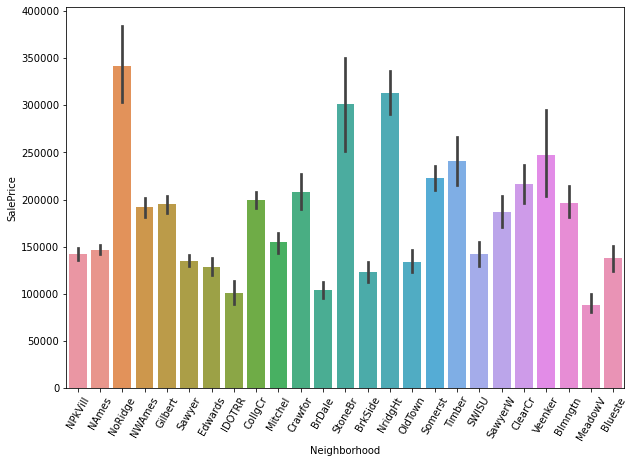

In [101]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Neighborhood',y='SalePrice',data=df_train)
plt.xticks(rotation = 60)

Properties which are near to NorthRidge are having higher sales. As per investment purpose any builder can invest in such properties where demand is high

In [102]:
df_train['Condition1'].unique()

array(['Norm', 'Feedr', 'RRAn', 'PosA', 'RRAe', 'Artery', 'PosN', 'RRNe',
       'RRNn'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Norm'),
  Text(1, 0, 'Feedr'),
  Text(2, 0, 'RRAn'),
  Text(3, 0, 'PosA'),
  Text(4, 0, 'RRAe'),
  Text(5, 0, 'Artery'),
  Text(6, 0, 'PosN'),
  Text(7, 0, 'RRNe'),
  Text(8, 0, 'RRNn')])

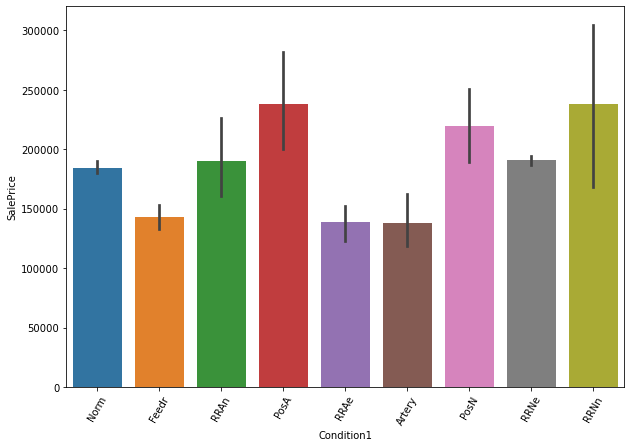

In [103]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Condition1',y='SalePrice',data=df_train)
plt.xticks(rotation = 60)

Condition wise properties which belongs to posA and RRNn are having higher sales as per the barplot we can see above

In [104]:
df_train['BldgType'].unique()

array(['TwnhsE', '1Fam', 'Duplex', 'Twnhs', '2fmCon'], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TwnhsE'),
  Text(1, 0, '1Fam'),
  Text(2, 0, 'Duplex'),
  Text(3, 0, 'Twnhs'),
  Text(4, 0, '2fmCon')])

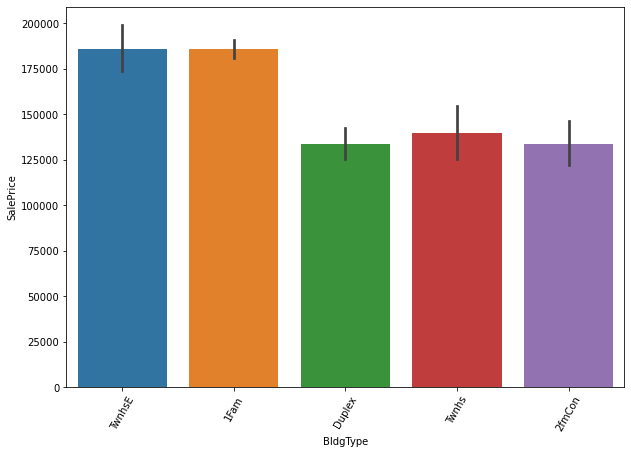

In [105]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'BldgType',y='SalePrice',data=df_train)
plt.xticks(rotation = 60)

As we see above got the analysis that TwnhsE and 1 Farm are in demand. And investing in these building type will be profitable for builder wh wants to invest in these Buisness

In [106]:
df_train['HouseStyle'].unique()

array(['1Story', '2Story', '1.5Fin', 'SFoyer', '1.5Unf', 'SLvl', '2.5Fin',
       '2.5Unf'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1Story'),
  Text(1, 0, '2Story'),
  Text(2, 0, '1.5Fin'),
  Text(3, 0, 'SFoyer'),
  Text(4, 0, '1.5Unf'),
  Text(5, 0, 'SLvl'),
  Text(6, 0, '2.5Fin'),
  Text(7, 0, '2.5Unf')])

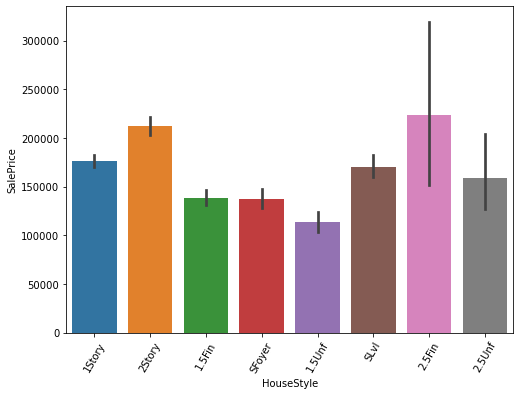

In [107]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'HouseStyle',y='SalePrice',data=df_train)
plt.xticks(rotation = 60)

as a resident purpose we can see that 2.5Fin area is in more demand 

In [108]:
df_train['OverallQual'].unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

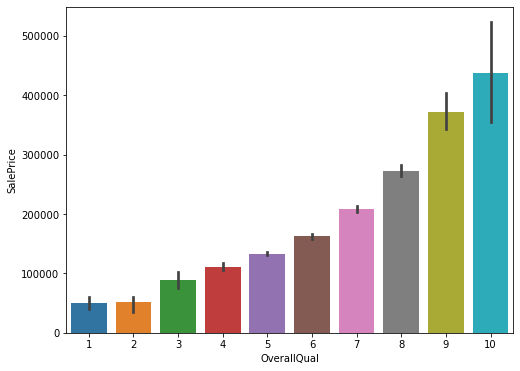

In [110]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'OverallQual',y='SalePrice',data=df_train)

quality wise we can see that if the quality of the building is good higher the rate will be. 

In [111]:
df_train['OverallCond'].unique()

array([5, 6, 7, 4, 8, 2, 3, 9, 1])

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

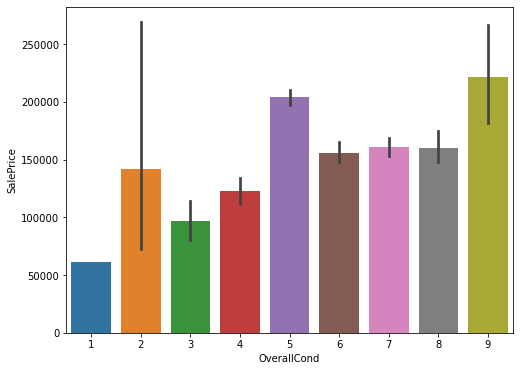

In [112]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'OverallCond',y='SalePrice',data=df_train)

Condition wise also rating of which is higher that means condition for the building which is in very good condition having higher price

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

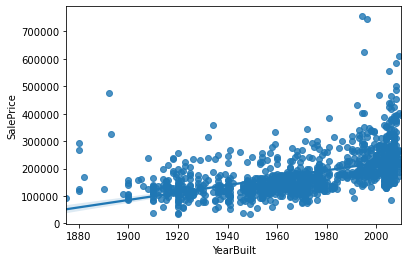

In [116]:
sns.regplot(x='YearBuilt',y='SalePrice',data=df_train)

With the help of regplot we can see that newly constructed bulding are having higher price value. As in the yar 2000 we can see that 
price value has been increased compare to older construction.

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

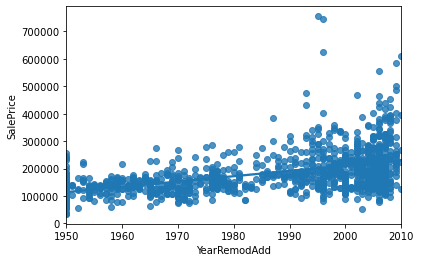

In [118]:
sns.regplot(x='YearRemodAdd',y='SalePrice',data=df_train)

Again same we seen in remodelling of house which has been remodelled  very recent are having higher demand and good sale value we can see with the help of regplot

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

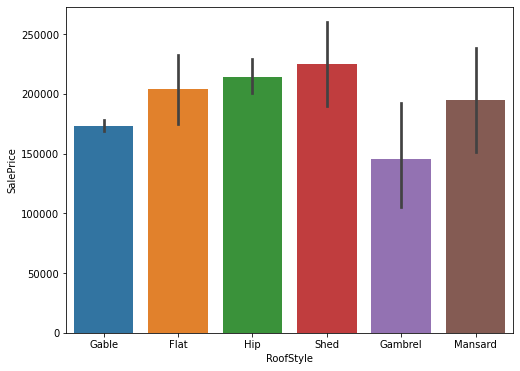

In [120]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'RoofStyle',y='SalePrice',data=df_train)

Shed roof are more having higher value . So we can say that investing in shed type of roof will be more profitable for any businessperson

In [121]:
df_train['RoofMatl'].unique()

array(['CompShg', 'Tar&Grv', 'WdShngl', 'WdShake', 'Roll', 'ClyTile',
       'Metal', 'Membran'], dtype=object)

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

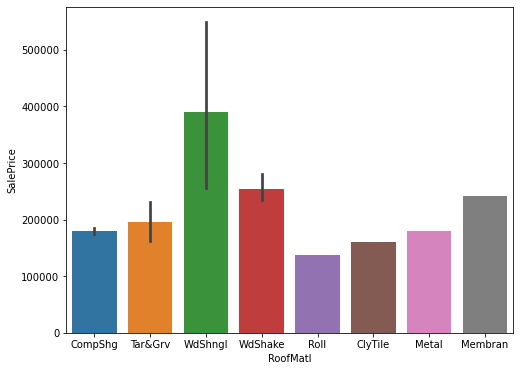

In [122]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'RoofMatl',y='SalePrice',data=df_train)

Material wise WdShngl are having higher sales value. So we can consider that in US this material are having good demand 
and poeple are more peeferring this material

In [125]:
df_train['Exterior1st'].value_counts()

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
BrkComm      1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CemntBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Stucco'),
  Text(7, 0, 'WdShing'),
  Text(8, 0, 'BrkFace'),
  Text(9, 0, 'Stone'),
  Text(10, 0, 'AsbShng'),
  Text(11, 0, 'AsphShn'),
  Text(12, 0, 'ImStucc'),
  Text(13, 0, 'BrkComm')])

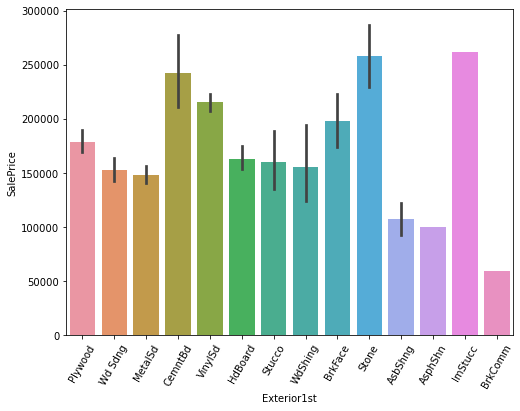

In [126]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'Exterior1st',y='SalePrice',data=df_train)
plt.xticks(rotation = 60)

Material used for exterior covering of house are mainly cemntBd, stone,ImStucc are more in demand and higher price. These Material in US for house building are more profitable to invest

(array([0, 1, 2]),
 [Text(0, 0, 'BrkFace'), Text(1, 0, 'Stone'), Text(2, 0, 'BrkCmn')])

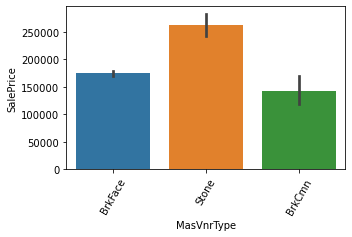

In [130]:
plt.figure(figsize=(5,3))
sns.barplot(x = 'MasVnrType',y='SalePrice',data=df_train)
plt.xticks(rotation = 60)

Stone type of Masnory Veneer are showing high sales.

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

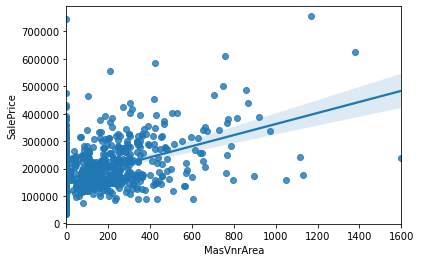

In [132]:
sns.regplot(x='MasVnrArea',y='SalePrice',data=df_train)

200 - 500 sqft of veneer area are having higher sales value. While above 800 sft are not having so much of demand though few of the venner have been sold in higher rate but are very less as we observe through dots above rs.500000

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

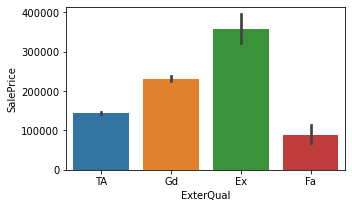

In [136]:
plt.figure(figsize=(5,3))
sns.barplot(x = 'ExterQual',y='SalePrice',data=df_train)

Quality of the exterior of any bulding or appartment matters a lot as longitivity of any construction base is exterior quality. 
Excellent quality used are showing higher sales value while fair is having very low price 

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

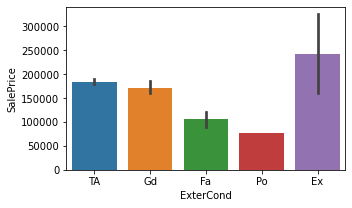

In [138]:
plt.figure(figsize=(5,3))
sns.barplot(x = 'ExterCond',y='SalePrice',data=df_train)

Excellent material present condition assuming having good condition as we can see rgar sales for this is higher even in utility also seen demand foe this was higher 

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

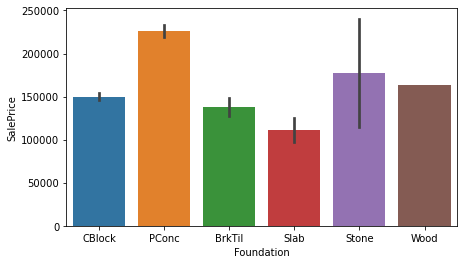

In [140]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'Foundation',y='SalePrice',data=df_train)

Poured contrete foundation are more in demand while slab doens't show much demand in market. This we can see through sales graph of each foundation.

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

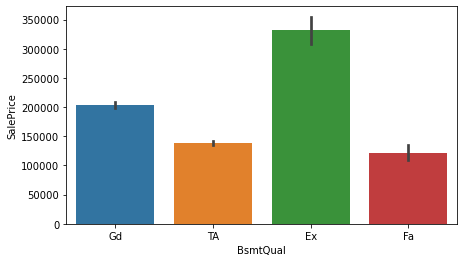

In [142]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'BsmtQual',y='SalePrice',data=df_train)

Height of the basement being rated excellent which ranges between 100+ inches are having higher sales value which is almost above 3 lac. While basement height ranges from 70 - 89 ft which is for typical/ average and fair are showing very low selling price in market which is below 1.5 lac 

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

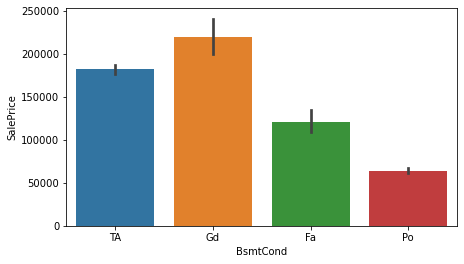

In [143]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'BsmtCond',y='SalePrice',data=df_train)

Basement which are in good condition means no dampness or crack are having higher value in market while with little crack or dampness is also fine as the price difference between good and average is slight . While with poor condition id having very low price which is obvious. Whoever buy such property with poor quality of basement they again have to invest in renovation .

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

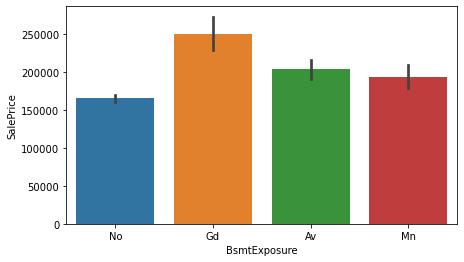

In [144]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'BsmtExposure',y='SalePrice',data=df_train)

Basement exposure which here refers to walkout or garden level walls. So here with good exposure having selling price upto 2.5 lac while no exposure are having price upto 1.6 lac. We can assume that demand for walkout area is higher and more person invest in such properties which is having such kind of facility even though it’s minimum but buyers prefer this area. 

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

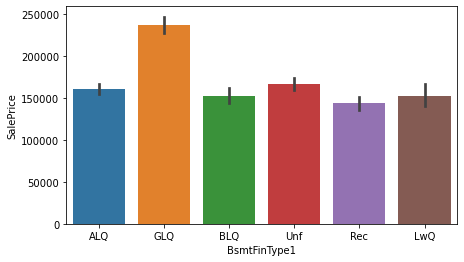

In [146]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'BsmtFinType1',y='SalePrice',data=df_train)

Most of the basement generally have a small living area which being used by watchman of the property or for any other purpose if watchman is not there. Here with the help of barplot we can see that good living quarter is having higher price value which is almost 2.5 lac while rest all are not having much variance in price. 

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

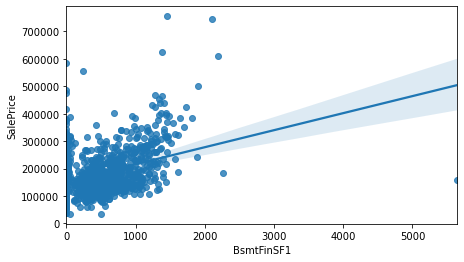

In [148]:
plt.figure(figsize=(7,4))
sns.regplot(x = 'BsmtFinSF1',y='SalePrice',data=df_train)

Finished sqft for type1 we can see with the help of regplot that within 2000 sft are having really good demand but above that are completely flat or nil 
may be of less or no demand in the market.Even bove we seen that good living quarter in type1 was more in demand in case of finishing. So concluding that type1 basement area within 2000 sft with Good living quarter finished will be in more demand and salable in the market

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

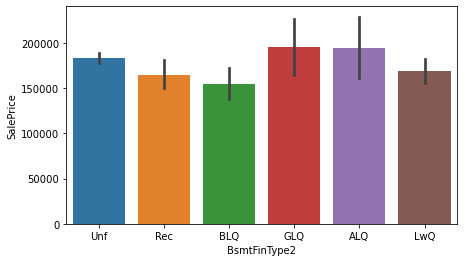

In [150]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'BsmtFinType2',y='SalePrice',data=df_train)

If there are various option for types of quarter available in basement for living purpose we can see that price variance do have slight difference. Good and Average living quarter are still having price range higher compare to other type of living quarter which ranges within 1.5 lac

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

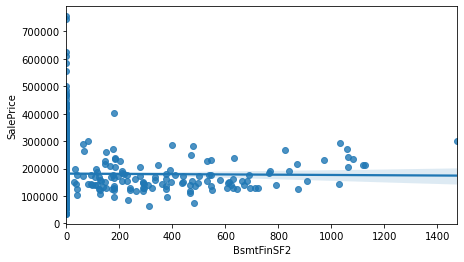

In [151]:
plt.figure(figsize=(7,4))
sns.regplot(x = 'BsmtFinSF2',y='SalePrice',data=df_train)

with the help of regplot we can see that almost demand for type2 basement finished sft are flat like within 600 sft almost having
equal saleable value i.e., range from 100000 - 200000 . While for 200 sft only showing 1 dot above 400000 price else we can't see much higher value
for basement2 . After 1200 sft there is no sale that means no demand above 1000 sft.

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

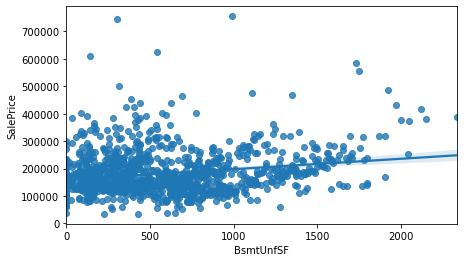

In [157]:
plt.figure(figsize=(7,4))
sns.regplot(x = 'BsmtUnfSF',y='SalePrice',data=df_train)

unfinished basement area ranging from 100 - 1500 sft we can see that ranges from 100000 - 400000 is the general price for sales. 
Price wise we can say that above 1500 sft price increases as we seen few of the dots above 400000 which may be the reason for less demand in the market.
Most probably more reasonable we can say that starting from 100 - 1000 sft which is reasonable and showinh same trend with respect to price

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

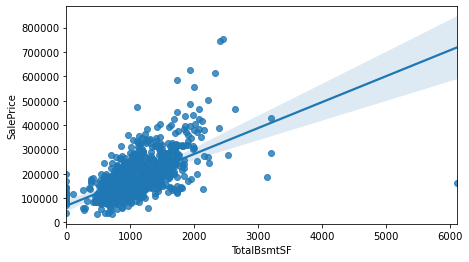

In [159]:
plt.figure(figsize=(7,4))
sns.regplot(x = 'TotalBsmtSF',y='SalePrice',data=df_train)

Above also in unfinished sft we observed that mainly below 2000 sft are in reasonable rate and in more demand so same we got
here in total basement sft which that within 2000 sft ranges of basement are more saleable and showing positive price value as we can see the 
line is going up only which refers positive relation between sales value and total basement sft sale.

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

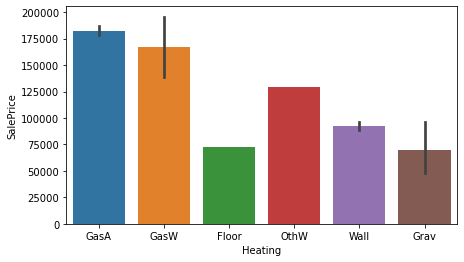

In [161]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'Heating',y='SalePrice',data=df_train)

GasA are having higher sales value. Here we can consider that in US heating type mostly prefered by customer is GasA followed by GasW

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

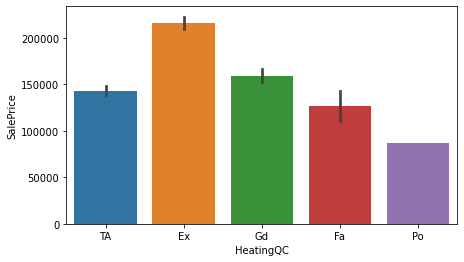

In [163]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'HeatingQC',y='SalePrice',data=df_train)

With the above exterior quality we came across that EX are more in demand and same here we can see that heating quality and condition for EX are more prefered as sale price for this is higher in market.

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

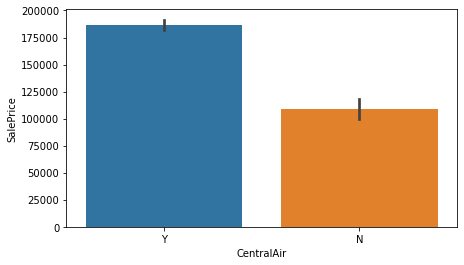

In [165]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'CentralAir',y='SalePrice',data=df_train)

Central aircondition we can say are more prefereable as building or residential which are having this facility are more in demand with the help of barplot we can observe the same.

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

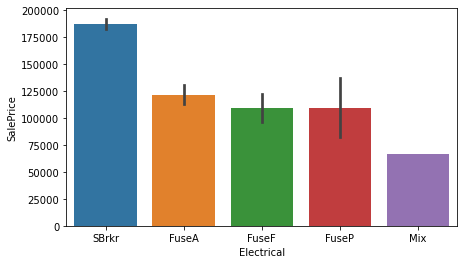

In [167]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'Electrical',y='SalePrice',data=df_train)

SBrkr electrical system are more prefered by US resident. 

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

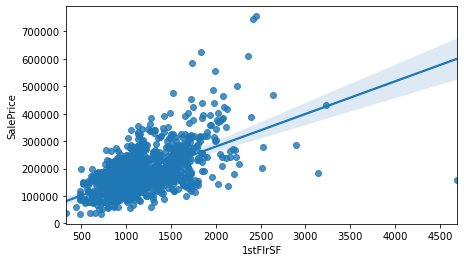

In [169]:
plt.figure(figsize=(7,4))
sns.regplot(x = '1stFlrSF',y='SalePrice',data=df_train)

In respect of sft we observed in fews columns above too that sft from 500 - 1500 sft are more in demand and same for 1st floor
here we can observe. Only few are there above 2000 sft which being sold out above rs.500000 . One more thing we can say that 
with increase in sft price also increases which restrcit most of the buyers to purchase above 1500 sft though demand may be there or 
people may have willing to purchase but due to high budget they don't prefer. Also we can say one more thing as in US most of the families are
neuclear and small so they don't require much spacious place. Here we need to see their demand as well as budget in which what they are preferring and why?

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

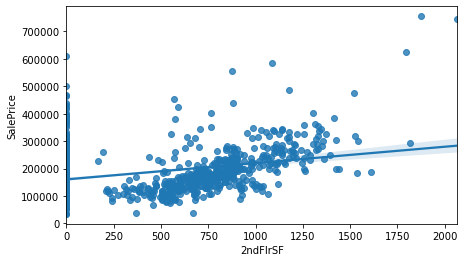

In [170]:
plt.figure(figsize=(7,4))
sns.regplot(x = '2ndFlrSF',y='SalePrice',data=df_train)

What we observed in 1st floow mainly aft starts from 500 - 1500 are more in demand while in 2nd floor there are no construction above 2000sft. And starting we can see that
250 sft are being sold.So construction on 1st floor are different from 2nd floow and so the demand are also less for this floor compare to 1st floor.

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

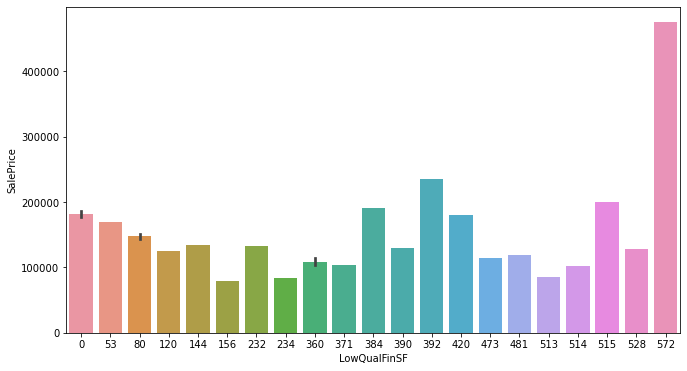

In [173]:
plt.figure(figsize=(11,6))
sns.barplot(x = 'LowQualFinSF',y='SalePrice',data=df_train)

Here we are analyzing low quality finishing of sft for all floor in which we found that floor no 572 are showing good sales and value for this floor are higher so 
we can assume that 572 is built up with good quality while 156 we can consider that having very low quality finishing as demand for this is least.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

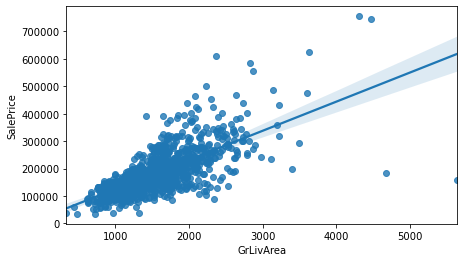

In [175]:
plt.figure(figsize=(7,4))
sns.regplot(x = 'GrLivArea',y='SalePrice',data=df_train)

Above ground living area above 500 sft - 1200 sft price is rs.200000 while above 2000 sft prices are almost rs.400000and so on with the increase in sft
price also becoming higher. but here we can say that trend for sft vs price are showing positive relation and people are choosing above 2000 sft even investing more.

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

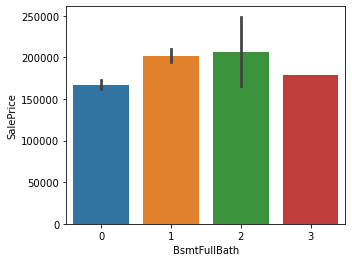

In [178]:
plt.figure(figsize=(5,4))
sns.barplot(x = 'BsmtFullBath',y='SalePrice',data=df_train)

basement full bathroom with 1 and2 are in good demand 

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

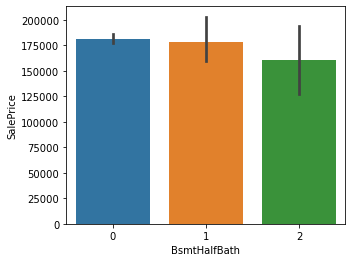

In [179]:
plt.figure(figsize=(5,4))
sns.barplot(x = 'BsmtHalfBath',y='SalePrice',data=df_train)

Almost all are having equal weighatge in case of basement half bathromm likewise in full bathroom we seen that 1 & 2 were 
in more demand but here almost price for all are same falls within 1,60,000 - 1,75,000

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

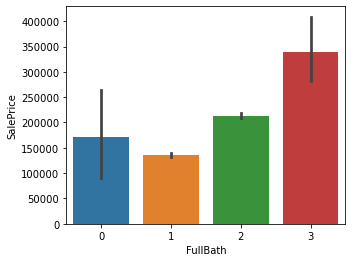

In [180]:
plt.figure(figsize=(5,4))
sns.barplot(x = 'FullBath',y='SalePrice',data=df_train)

full bathroom above grade for 3 are in more demand and the price are also pretty high compare to basement full and half bathroom


<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

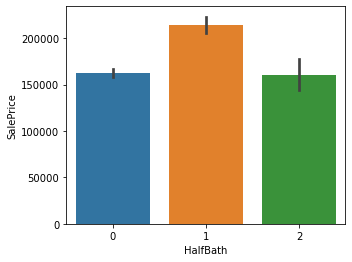

In [181]:
plt.figure(figsize=(5,4))
sns.barplot(x = 'HalfBath',y='SalePrice',data=df_train)

price for halfbath is low compae to full bath as we seen above that price for full bath reached to 3.5 lac while here in half bathroom 
we can see that highest price reached upto 2 lac which is for 1 bathroom 

In [182]:
df_train['BedroomAbvGr'].unique()

array([2, 4, 3, 1, 5, 0, 6, 8])

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

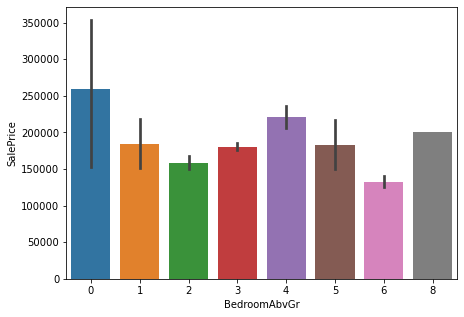

In [184]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'BedroomAbvGr',y='SalePrice',data=df_train)

Bedroom above grade for 0 we can see higher in demand. Which means doesnot include basement bedroom. Here we can consider that 
bedroom of floor above basement are more saleable compare to others

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

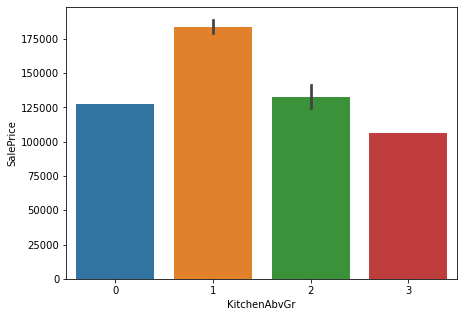

In [185]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'KitchenAbvGr',y='SalePrice',data=df_train)

bedroom above grade we seen that for 0 was more in demand while kitchen for 1 is more in demand for above grade.

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

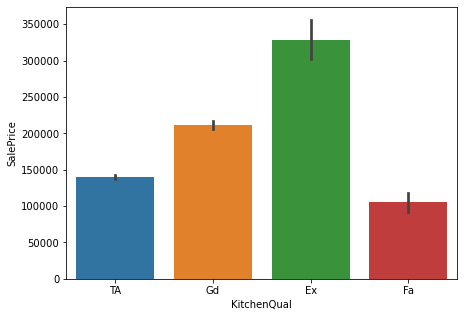

In [186]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'KitchenQual',y='SalePrice',data=df_train)

Quality wise observed above too that EX is more in demand and considered as best quality compare to any other material 
so same for kitchen quality EX being considered as a supirior quality.

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

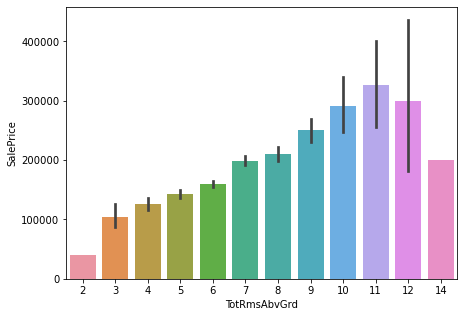

In [187]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'TotRmsAbvGrd',y='SalePrice',data=df_train)

Room with 11 are having highest selling value which is almost above 3 lac which is excluding bathroom. While having only  2 rooms are having almost very low price even negligible so we can say that if the number of rooms will be more price will be high but after 11 as we seen that 12 and 14 rooms excluding bathroom price declined a lot. Means most preferred and demanding room with total number is 8

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

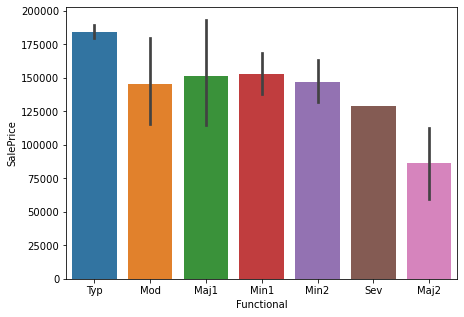

In [188]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'Functional',y='SalePrice',data=df_train)

Home functionality wise demand for Typ is higher as the price for the same in market is above 1.75 lac.

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

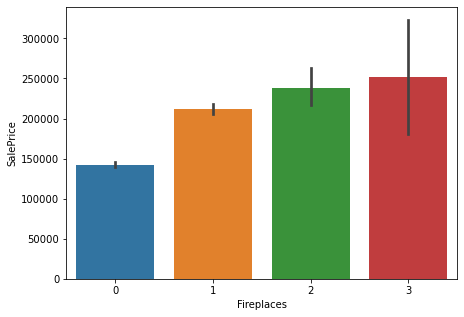

In [189]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'Fireplaces',y='SalePrice',data=df_train)

building or resident area having 3 fireplace are more in demand. We can assume here that people in US prefer safety and
gining more priority to this so residents with more fireplace are more saleable.

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

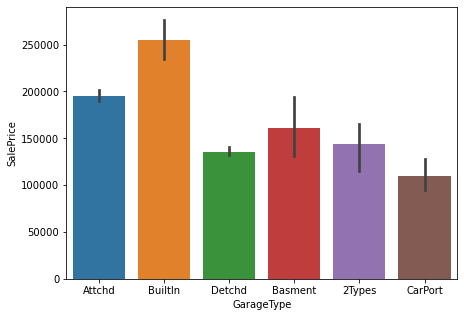

In [191]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'GarageType',y='SalePrice',data=df_train)

Garage which is having room above garage or we can say that in ground floor garage being build and above houses are built to stay having higher sales value which is obvious as person don’t have to go anywhere else to park there car or bike even it will be more safer. As we can see from bar plot that houses having garage apart from their place having very low value in market.

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

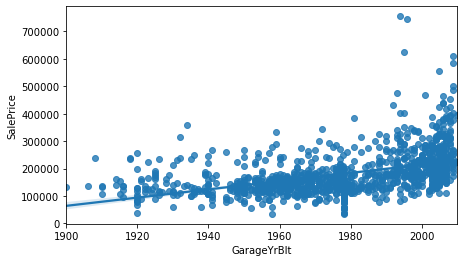

In [193]:
plt.figure(figsize=(7,4))
sns.regplot(x = 'GarageYrBlt',y='SalePrice',data=df_train)

newly built garages are in more demand compare to those which built before year 2000 as with year passed price also hiked an can see not much 
but little price hike for garages built recently. Few outliers also we can see as some points are above 7k which may show some outliers as this price is not usual

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

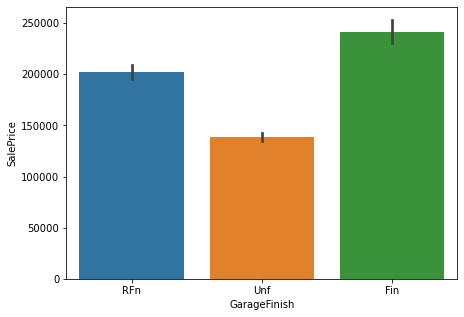

In [195]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'GarageFinish',y='SalePrice',data=df_train)

Garage with complete work are more in demand and so the price is high which almost reached 2.5 lac followed by roughly finished garage which may fit to those whose budget is little low and can manageable. While Unfinished garage are having very low price. As if someone takes unfinished garage they have to work on that for use so what seller did by keeping lower selling price at least trying sell out those too.

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

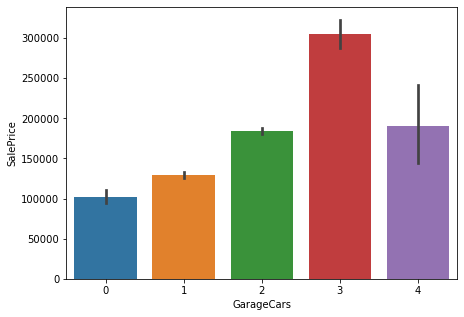

In [197]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'GarageCars',y='SalePrice',data=df_train)

Garage which are having capacity to have 3 cars in it are in high demand as the selling price for the same we can see reached upto 3 lac while with no car capacity is below 1 lac. And this type of garage those customer will only invest who doesn’t have car or budget is very low but wants to have garage space too.

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

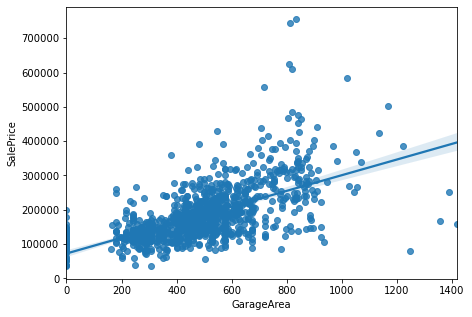

In [199]:
plt.figure(figsize=(7,5))
sns.regplot(x = 'GarageArea',y='SalePrice',data=df_train)

garage area mainly we can observe that from 500 - 600 sft are having price upto 3 lac and are having higher sale price. That means 
market trend over there for 500 - 600 sft is in more demand. Few outliers we can see here as some of the dots are showing very high price which is unusual. will check through other process too

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

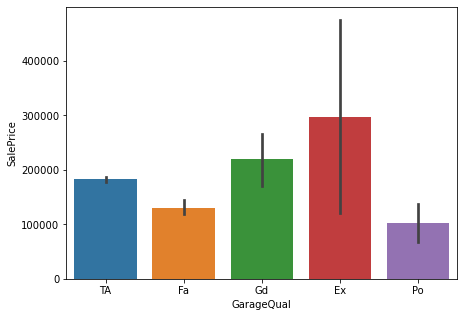

In [201]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'GarageQual',y='SalePrice',data=df_train)

quality wise Ex is supirior that we analysed in above other quality preference. Here for garage too Ex being supirior in quality and price are almost above 3 lac

<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

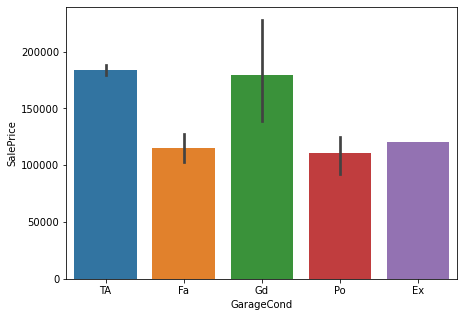

In [203]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'GarageCond',y='SalePrice',data=df_train)

Condition of garage we seen that for good and average is having higher selling price. For this may be the reason is customer sees the quality of material being used while constructing the same. And if the material used and quality for the same is of higher quality customer preferring good an average condition for the same. 

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

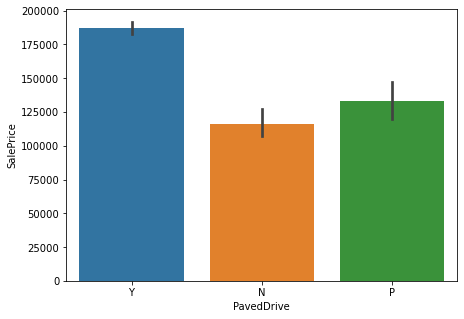

In [205]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'PavedDrive',y='SalePrice',data=df_train)

If the paved driveway is there near the property that property rate is high and the selling price is almost reached above 1.75 lac.  While the property not adjacent to paved driveway having lowest selling price which is below 1.25 lac.

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

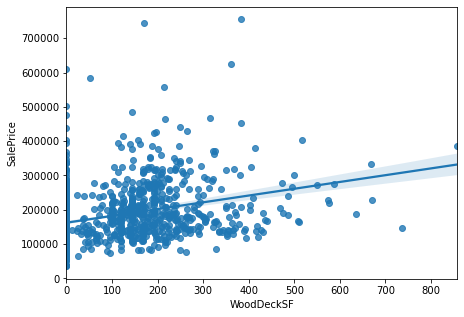

In [207]:
plt.figure(figsize=(7,5))
sns.regplot(x = 'WoodDeckSF',y='SalePrice',data=df_train)

wooden area we can see that from 100 sft to 300 sft are in demand as price for these are between 1 lac to 3 lac. above 300 sft 
are less in demand and as per above plot we can assume that mostly people prefer partial wooden deck area in US.

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

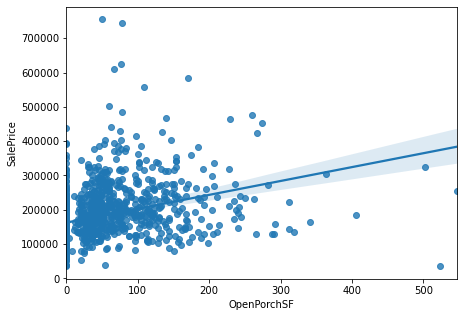

In [209]:
plt.figure(figsize=(7,5))
sns.regplot(x = 'OpenPorchSF',y='SalePrice',data=df_train)

open porch area which is we can say that one of the trend in construction of properties in US being followed mostly. Here for open porch 
within 150 sft mostly are in demand and the price trend for this is within 1 lac to 3 lac. Few of the outliers are in this column too. Will fix it using outlier process

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

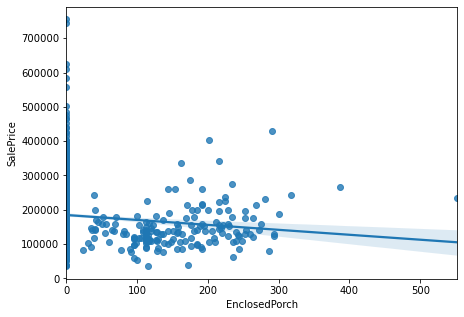

In [210]:
plt.figure(figsize=(7,5))
sns.regplot(x = 'EnclosedPorch',y='SalePrice',data=df_train)

Enclosed porch people are not prefering much to have in bigger space as we can see with the help of regplot that within 
300 sft that too are not much in demand as the space preference is less so equally the price are also ranging between 1 - 2 lac maximum

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

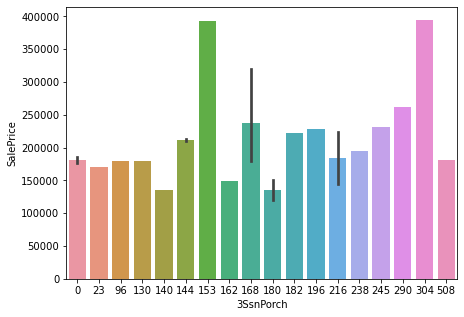

In [213]:
plt.figure(figsize=(7,5))
sns.barplot(x = '3SsnPorch',y='SalePrice',data=df_train)

As we can see the trend of 3 Season  porch which we can say anenclosed room with lots of windows usually used in summer, spring and fall but not in winter by residents there.
For small space house is 153 sft which is more in demand and for bigger space house we can say
that 304 sft is in more demand as price for these two are almost same i.e., upto 4 lac being invested to have this portion

<AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>

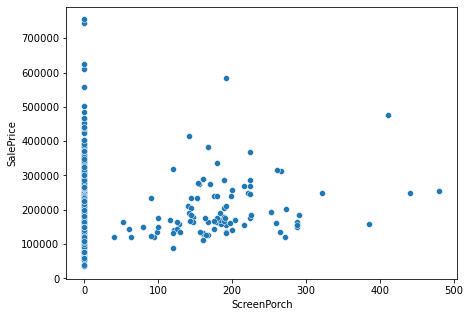

In [219]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = 'ScreenPorch',y='SalePrice',data=df_train)

screen porch are mainly used in exterior of the house to cover windows or house so that no insect or any undesirable objects
enters the house. Here we can see that from 100 - 200 sft been mainly used for this kind of usage

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

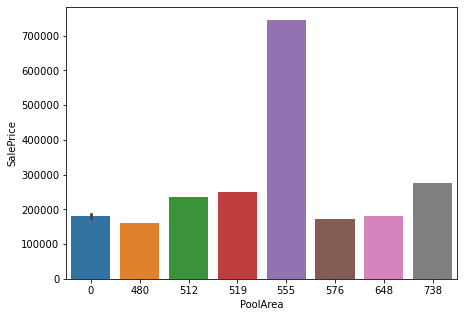

In [223]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'PoolArea',y='SalePrice',data=df_train)

Pool area mainly prefered is 555 sft which is having higer selling price compare to other area 

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

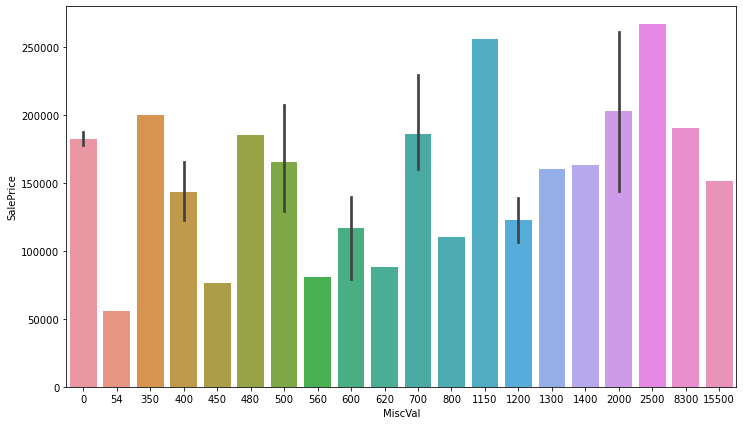

In [229]:
plt.figure(figsize=(12,7))
sns.barplot(x = 'MiscVal',y='SalePrice',data=df_train)

Value for miscellenous feature we can say for some like 1150, 2500 sft areas ara having price upto 2.5 lac.

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

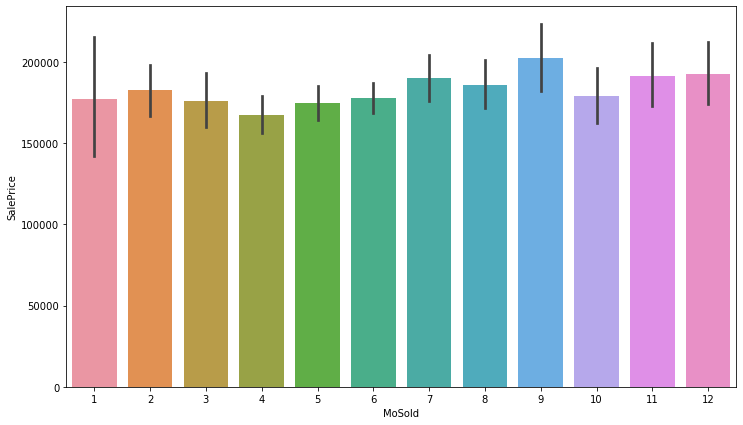

In [231]:
plt.figure(figsize=(12,7))
sns.barplot(x = 'MoSold',y='SalePrice',data=df_train)

This column gives us the insight that which month the sale is high and we can see that 9th which is september month mostly the sale is in peak 
and price also varies with the month. Lowest sale we can observe in the month of April.

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

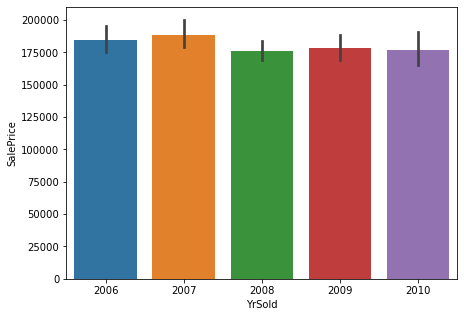

In [234]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'YrSold',y='SalePrice',data=df_train)

Highest selling price for house we can see was in the year 2007 after that though the price being constant for 2008,2009,2010 but we can see the diminishing 
price for properties after 2007 which shows that property rate being decreased after 2007 and after that it's constant means not much change in price

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

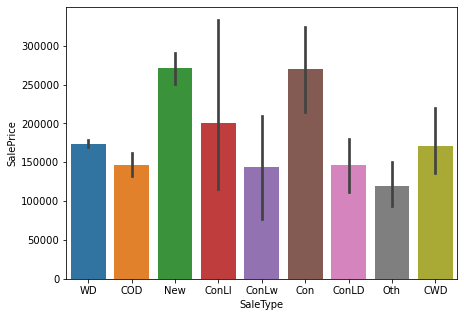

In [235]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'SaleType',y='SalePrice',data=df_train)

Selling piece is higher in the market for newly constructed houses and contract with 15% down payment regular terms. Newly constructed will obviously have higher price as in market everybody demand for the same and 15% down payment will be convenient for most of the buyers so these types of houses are having higher selling value.

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

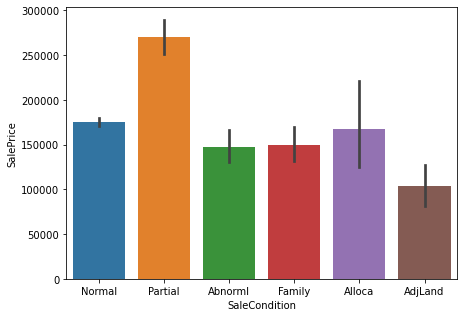

In [236]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'SaleCondition',y='SalePrice',data=df_train)

Here with the help of bar plot we get the insight that mainly for houses which are in under construction condition i.,e partial finished houses are having higher selling value. There may two reason for having higher value as under construction houses any one can modify according to their choice and need. Another reason we can say that after completion a person will get newly constructed house at low rate compare to finished house 

## Checking Skewness in data

In [47]:
numerical = ['LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

In [247]:
df_train.skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [265]:
skew = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
       'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF',]

In [266]:
for col in skew:
    if df_train.skew().loc[col]>0.55:
        df_train[col]=np.log1p(df_train[col])

As skewness can be removed only for continous data. We generally consider normal or symitric distribution for those which ranges within -.5/+.5
And here columns which are above -.5/+.5have been considered as skewed data and removed the same using Log1p which is near to 0 
and for our model performance near to 0 will be best

In [267]:
df_train.skew()

MSSubClass        1.422019
LotFrontage      -0.815665
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        0.494344
BsmtFinSF1       -0.606859
BsmtFinSF2        2.502785
BsmtUnfSF        -2.129882
TotalBsmtSF      -5.146574
1stFlrSF          0.105795
2ndFlrSF          0.289335
LowQualFinSF      8.666142
GrLivArea         0.001448
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        0.131075
OpenPorchSF      -0.004279
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

Rechecked and found almost skewness have been removed from data now will remove test data skewness 

In [268]:
df_test.skew()

MSSubClass        1.358597
LotFrontage       1.162512
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        2.474098
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.596629
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
dtype: float64

In [269]:
skew_test = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea',
       'GarageYrBlt','WoodDeckSF','OpenPorchSF']

In [270]:
for col in skew_test:
    if df_test.skew().loc[col]>0.55:
        df_test[col]=np.log1p(df_test[col])

In [271]:
df_test.skew()

MSSubClass        1.358597
LotFrontage      -0.817338
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        0.635097
BsmtFinSF1       -0.668665
BsmtFinSF2        2.622732
BsmtUnfSF        -2.454060
TotalBsmtSF       0.519257
1stFlrSF         -0.013105
2ndFlrSF          0.292337
LowQualFinSF     10.929928
GrLivArea        -0.022042
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.596629
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        0.244705
OpenPorchSF      -0.100802
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
dtype: float64

Similarly as train data removed skewness from test dataset

## Removing Outliers

Outliers are such value which will be unusual or out of dataset. So we need to remove outliers so that our model performance will not be affected and 
the standard range of outliers are between -3 to +3 if anything above are considered as outliers. And as skewness outliers are also been used for continous data only

In [276]:
cont_data_train=['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
       'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF']

<Figure size 1440x1080 with 0 Axes>

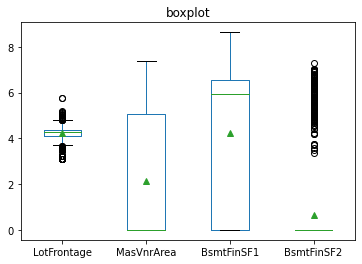

In [288]:
plt.figure(figsize=(20,15))
ax = df_train[['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()


<Figure size 1440x1080 with 0 Axes>

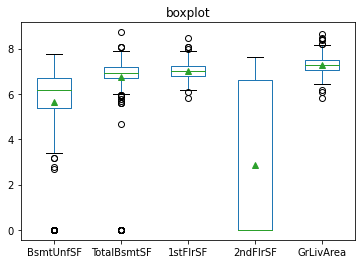

In [293]:
plt.figure(figsize=(20,15))
ax = df_train[['BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()


<Figure size 1440x1080 with 0 Axes>

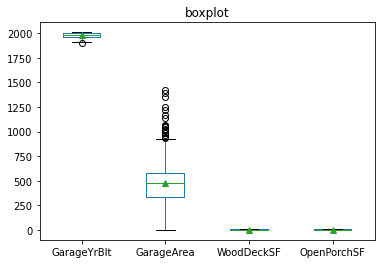

In [294]:
plt.figure(figsize=(20,15))
ax = df_train[['GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()


outliers found in :
1. LotFrontage
2. BsmtFinSF2
3. BsmtUnfSF
4. TotalBsmtSF
5. 1stFlrSF
6. GrLivArea
7. GarageYrBlt
8. GarageArea

In [302]:
cont_col = df_train[['LotFrontage','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageYrBlt',
                     'GarageArea']]

In [301]:
from scipy.stats import zscore

In [303]:
# applying zscore on only the dataset which has continuous columns
z=np.abs(zscore(cont_col))

df_train_new=df_train[(z<3).all(axis=1)]

In [304]:
print("shape before and after")
print("shape before".ljust(20),":", df_train.shape)
print("shape after".ljust(20),":", df_train_new.shape)
print("Percentage Loss".ljust(20),":", (df_train.shape[0]-df_train_new.shape[0])/df_train.shape[0])

shape before and after
shape before         : (1168, 75)
shape after          : (1048, 75)
Percentage Loss      : 0.10273972602739725


% of data loss is 0.1% which is acceptable as we didn't loosed lot many data while removing outliers using Z score method

## Removing outliers for test dataset

In [305]:
cont_data_test=['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
       'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF']

<Figure size 1440x1080 with 0 Axes>

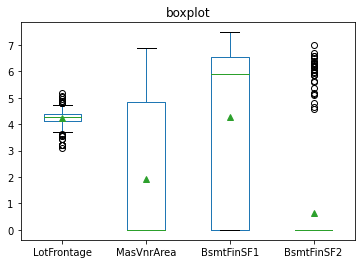

In [306]:
plt.figure(figsize=(20,15))
ax = df_test[['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()


<Figure size 1440x1080 with 0 Axes>

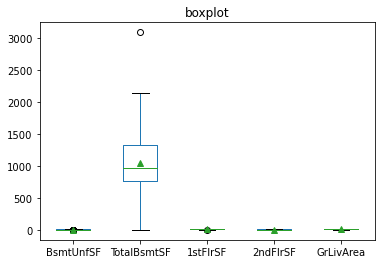

In [307]:
plt.figure(figsize=(20,15))
ax = df_test[['BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()


<Figure size 1440x1080 with 0 Axes>

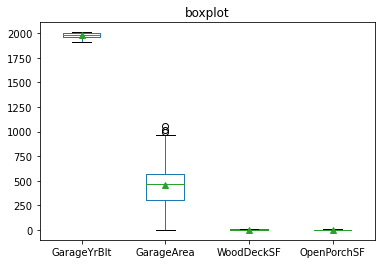

In [308]:
plt.figure(figsize=(20,15))
ax = df_test[['GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()


Outliers found in test data :
1. LotFrontage
2. BsmtFinSF2
3. TotalBsmtSF
4. GarageArea

In [309]:
cont_col_test = df_test[['LotFrontage','BsmtFinSF2','TotalBsmtSF','GarageArea']]                   

In [310]:
# applying zscore on only the dataset which has continuous columns
z=np.abs(zscore(cont_col_test))

df_test_new=df_test[(z<3).all(axis=1)]

In [311]:
print("shape before and after")
print("shape before".ljust(20),":", df_test.shape)
print("shape after".ljust(20),":", df_test_new.shape)
print("Percentage Loss".ljust(20),":", (df_test.shape[0]-df_test_new.shape[0])/df_test.shape[0])

shape before and after
shape before         : (292, 74)
shape after          : (269, 74)
Percentage Loss      : 0.07876712328767123


In test data loss is almost very minimal which is less than 1% even. and removed outliers from test dataset too

## Feature Engineering

In [50]:
category = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

In [312]:
le = LabelEncoder()

In [313]:
df1 = le.fit_transform(df_train_new['MSZoning'])
df_train_new['MSZoning']=df1
df2 = le.fit_transform(df_train_new['Street'])
df_train_new['Street']= df2
df3 = le.fit_transform(df_train_new['LotShape'])
df_train_new['LotShape']=df3
df4 = le.fit_transform(df_train_new['LandContour'])
df_train_new['LandContour']=df4
df5 = le.fit_transform(df_train_new['Utilities'])
df_train_new['Utilities']=df5
df6 = le.fit_transform(df_train_new['LotConfig'])
df_train_new['LotConfig']=df6
df7 = le.fit_transform(df_train_new['LandSlope'])
df_train_new['LandSlope']=df7
df8 = le.fit_transform(df_train_new['Neighborhood'])
df_train_new['Neighborhood']=df8
df9 = le.fit_transform(df_train_new['Condition1'])
df_train_new['Condition1']=df9
df10 = le.fit_transform(df_train_new['Condition2'])
df_train_new['Condition2']=df10
df11 = le.fit_transform(df_train_new['BldgType'])
df_train_new['BldgType']=df11
df12 = le.fit_transform(df_train_new['HouseStyle'])
df_train_new['HouseStyle']=df12
df13 = le.fit_transform(df_train_new['RoofStyle'])
df_train_new['RoofStyle']=df13
df14 = le.fit_transform(df_train_new['RoofMatl'])
df_train_new['RoofMatl']=df14
df15 = le.fit_transform(df_train_new['Exterior1st'])
df_train_new['Exterior1st']=df15
df16 = le.fit_transform(df_train_new['Exterior2nd'])
df_train_new['Exterior2nd']=df16
df17 = le.fit_transform(df_train_new['MasVnrType'])
df_train_new['MasVnrType']=df17
df18 = le.fit_transform(df_train_new['ExterQual'])
df_train_new['ExterQual']=df18
df19 = le.fit_transform(df_train_new['ExterCond'])
df_train_new['ExterCond']=df19
df20 = le.fit_transform(df_train_new['Foundation'])
df_train_new['Foundation']=df20
df21 = le.fit_transform(df_train_new['BsmtQual'])
df_train_new['BsmtQual']=df21
df22 = le.fit_transform(df_train_new['BsmtCond'])
df_train_new['BsmtCond']=df22
df23 = le.fit_transform(df_train_new['BsmtExposure'])
df_train_new['BsmtExposure']=df23
df24 = le.fit_transform(df_train_new['BsmtFinType1'])
df_train_new['BsmtFinType1']=df24
df25 = le.fit_transform(df_train_new['BsmtFinType2'])
df_train_new['BsmtFinType2']=df25
df26 = le.fit_transform(df_train_new['Heating'])
df_train_new['Heating']=df26
df27 = le.fit_transform(df_train_new['HeatingQC'])
df_train_new['HeatingQC']=df27
df28 = le.fit_transform(df_train_new['CentralAir'])
df_train_new['CentralAir']=df28
df29 = le.fit_transform(df_train_new['Electrical'])
df_train_new['Electrical']=df29
df30 = le.fit_transform(df_train_new['KitchenQual'])
df_train_new['KitchenQual']=df30
df31 = le.fit_transform(df_train_new['Functional'])
df_train_new['Functional']=df31
df32 = le.fit_transform(df_train_new['GarageType'])
df_train_new['GarageType']=df32
df33 = le.fit_transform(df_train_new['GarageFinish'])
df_train_new['GarageFinish']=df33
df34 = le.fit_transform(df_train_new['GarageQual'])
df_train_new['GarageQual']=df34
df35 = le.fit_transform(df_train_new['GarageCond'])
df_train_new['GarageCond']=df35
df36 = le.fit_transform(df_train_new['PavedDrive'])
df_train_new['PavedDrive']=df36
df37 = le.fit_transform(df_train_new['SaleType'])
df_train_new['SaleType']=df37
df38 = le.fit_transform(df_train_new['SaleCondition'])
df_train_new['SaleCondition']=df38

#### Converting Test data object into numerical form

In [315]:
df1 = le.fit_transform(df_test_new['MSZoning'])
df_test_new['MSZoning']=df1
df2 = le.fit_transform(df_test_new['Street'])
df_test_new['Street']= df2
df3 = le.fit_transform(df_test_new['LotShape'])
df_test_new['LotShape']=df3
df4 = le.fit_transform(df_test_new['LandContour'])
df_test_new['LandContour']=df4
df5 = le.fit_transform(df_test_new['Utilities'])
df_test_new['Utilities']=df5
df6 = le.fit_transform(df_test_new['LotConfig'])
df_test_new['LotConfig']=df6
df7 = le.fit_transform(df_test_new['LandSlope'])
df_test_new['LandSlope']=df7
df8 = le.fit_transform(df_test_new['Neighborhood'])
df_test_new['Neighborhood']=df8
df9 = le.fit_transform(df_test_new['Condition1'])
df_test_new['Condition1']=df9
df10 = le.fit_transform(df_test_new['Condition2'])
df_test_new['Condition2']=df10
df11 = le.fit_transform(df_test_new['BldgType'])
df_test_new['BldgType']=df11
df12 = le.fit_transform(df_test_new['HouseStyle'])
df_test_new['HouseStyle']=df12
df13 = le.fit_transform(df_test_new['RoofStyle'])
df_test_new['RoofStyle']=df13
df14 = le.fit_transform(df_test_new['RoofMatl'])
df_test_new['RoofMatl']=df14
df15 = le.fit_transform(df_test_new['Exterior1st'])
df_test_new['Exterior1st']=df15
df16 = le.fit_transform(df_test_new['Exterior2nd'])
df_test_new['Exterior2nd']=df16
df17 = le.fit_transform(df_test_new['MasVnrType'])
df_test_new['MasVnrType']=df17
df18 = le.fit_transform(df_test_new['ExterQual'])
df_test_new['ExterQual']=df18
df19 = le.fit_transform(df_test_new['ExterCond'])
df_test_new['ExterCond']=df19
df20 = le.fit_transform(df_test_new['Foundation'])
df_test_new['Foundation']=df20
df21 = le.fit_transform(df_test_new['BsmtQual'])
df_test_new['BsmtQual']=df21
df22 = le.fit_transform(df_test_new['BsmtCond'])
df_test_new['BsmtCond']=df22
df23 = le.fit_transform(df_test_new['BsmtExposure'])
df_test_new['BsmtExposure']=df23
df24 = le.fit_transform(df_test_new['BsmtFinType1'])
df_test_new['BsmtFinType1']=df24
df25 = le.fit_transform(df_test_new['BsmtFinType2'])
df_test_new['BsmtFinType2']=df25
df26 = le.fit_transform(df_test_new['Heating'])
df_test_new['Heating']=df26
df27 = le.fit_transform(df_test_new['HeatingQC'])
df_test_new['HeatingQC']=df27
df28 = le.fit_transform(df_test_new['CentralAir'])
df_test_new['CentralAir']=df28
df29 = le.fit_transform(df_test_new['Electrical'])
df_test_new['Electrical']=df29
df30 = le.fit_transform(df_test_new['KitchenQual'])
df_test_new['KitchenQual']=df30
df31 = le.fit_transform(df_test_new['Functional'])
df_test_new['Functional']=df31
df32 = le.fit_transform(df_test_new['GarageType'])
df_test_new['GarageType']=df32
df33 = le.fit_transform(df_test_new['GarageFinish'])
df_test_new['GarageFinish']=df33
df34 = le.fit_transform(df_test_new['GarageQual'])
df_test_new['GarageQual']=df34
df35 = le.fit_transform(df_test_new['GarageCond'])
df_test_new['GarageCond']=df35
df36 = le.fit_transform(df_test_new['PavedDrive'])
df_test_new['PavedDrive']=df36
df37 = le.fit_transform(df_test_new['SaleType'])
df_test_new['SaleType']=df37
df38 = le.fit_transform(df_test_new['SaleCondition'])
df_test_new['SaleCondition']=df38

## Model Building 

#### Splitting feature and target into x and y respectively 

In [318]:
x = df_train_new.drop(columns = ['SalePrice'])
y = df_train_new['SalePrice']

In [317]:
df_train_new.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [319]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 1.70094003, -0.01556409,  0.0946171 , ..., -0.59489454,
         0.32841208,  0.18465509],
       [ 0.14681174, -0.01556409,  1.13194243, ..., -0.59489454,
         0.32841208,  0.18465509],
       [-0.88927379, -0.01556409,  1.66191768, ...,  1.6504217 ,
        -4.84716477,  0.18465509],
       ...,
       [-0.88927379, -0.01556409,  0.0946171 , ...,  1.6504217 ,
         0.32841208,  0.18465509],
       [ 0.40583312, -4.90891523, -1.30153545, ...,  0.15354421,
         0.32841208,  0.18465509],
       [ 0.14681174, -0.01556409,  0.0946171 , ..., -1.34333328,
         0.32841208,  0.18465509]])

Used standard scaler to bring all the units to same label so that our machine algorithm could perform better way as if all the units 
will be on same scale it will be easy for model to understand and predict

#### Finding Best Random State

In [320]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV

In [321]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    rsc = r2_score(y_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.8279445905614323 On Random state:  215


In [322]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.30,random_state=i)

Test data given 30% and training data is 70% which means our model will be trained on provided data and will understand the pattern
then will perform and predict with it's own understanding

In [323]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred))

0.8605602894869785


In [324]:
print(cross_val_score(lr,x_scaler,y,cv=5).mean())

0.8429006614677291


In [325]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(r2_score(y_test,pred))

0.6097497649114122


In [326]:
print(cross_val_score(dt,x_scaler,y,cv=5).mean())

0.7142887797906264


In [327]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred))

0.8852057661311514


In [328]:
print(cross_val_score(rf,x_scaler,y,cv=5).mean())

0.8694358298573228


### Using Lasso and Ridge checking whether model is overfitted or not

In [329]:
lassocv = LassoCV(alphas = None, max_iter=1000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [330]:
alpha = lassocv.alpha_
alpha

32.192325622877476

In [331]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=32.192325622877476)

In [332]:
lasso_reg.score(x_test,y_test)

0.862425562607965

In [333]:
ridgecv = RidgeCV(alphas =(0.1,1.0,10.0),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), normalize=True)

In [334]:
alpha = ridgecv.alpha_
alpha

0.1

In [335]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.1)

In [336]:
ridge_reg.score(x_test,y_test)

0.8606079607931862

Here we can see that from Linear Regression Lidge and Rasso are having almost similar score which means our model is not an overfitted model.

## Hyperparameter Tuning

From above model r2 score and CV we came across that Random Forest classifier is the best performing model as difference between are less for this model only.
And as we know that difference between CV score and metrix score of which model be less will be considered as best performing model. So will do hyperparameter tuning for 
RandomForest Classifier

In [339]:
# RandomForestRegressor
param = {'n_estimators':[300,500,700],
        'criterion':['mse','mae'],
        'max_depth':[2,4,6,8,10],
        'max_features':['auto','sqrt','log2']}

In [340]:
GC = GridSearchCV(rf,param,cv=5)

In [341]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 500, 700]})

In [342]:
GC.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 500}

In [344]:
final_rfc = RandomForestRegressor(criterion='mae',max_depth = 10, max_features = 'auto',n_estimators = 500)
final_rfc.fit(x_train,y_train)
pred = final_rfc.predict(x_test)
score = r2_score(y_test,pred)
print(score*100)

88.9872351155201


With the help of hyperparameter tuing tried to improve r2 score and with few points i.e., 0.40 % model performed well.
We can be able to improve score by adding more parameters to hyperparameter tuning.

## Save the Model

In [345]:
import joblib
joblib.dump(final_rfc,'Finalmodel Housing price')

['Finalmodel Housing price']

## Prediting model on test data

In [346]:
# prediction using the same model
loaded_model = joblib.load(open('Finalmodel Housing price', 'rb'))

In [347]:
prediction=loaded_model.predict(x_test)

In [348]:
prediction=pd.DataFrame(prediction) # Converting into Data frame

In [349]:
prediction

,0
0,145966.118
1,173917.327
2,212901.736
3,86783.132
4,347312.049
5,142469.163
6,242079.223
7,161724.010
8,120700.233
9,165059.409
